In [22]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import scipy
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm
import time

([<matplotlib.axis.XTick at 0x22752b73fc8>,
 <a list of 4 Text xticklabel objects>)

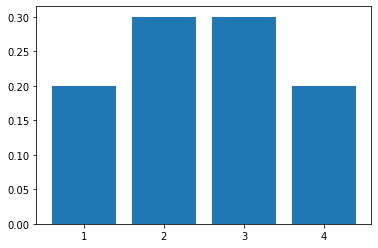

In [3]:
plt.bar([1,2,3,4], [0.2, 0.3, 0.3, 0.2])
plt.xticks([1,2,3,4])

In [8]:
np.random.randint(10000)

6552

In [9]:
df = pd.read_csv('Pearson.txt', sep='\t')

In [10]:
df.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


Text(0, 0.5, "Son's height(in)")

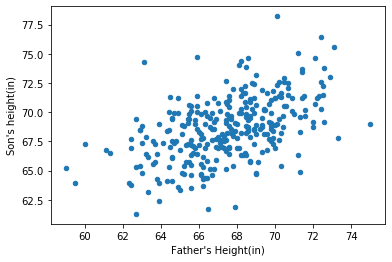

In [11]:
df.sample(300, random_state=2445).plot.scatter(x='Father', y='Son' )
plt.xlabel("Father's Height(in)")
plt.ylabel("Son's height(in)")

In [12]:
mu = df.mean()
mu

Father    67.686827
Son       68.684230
dtype: float64

In [13]:
sigma = df.cov()
sigma

,Father,Son
Father,7.539566,3.875382
Son,3.875382,7.930949


In [14]:
df.corr()

,Father,Son
Father,1.000000,0.501163
Son,0.501163,1.000000


Text(0, 0.5, "Son's height(in)")

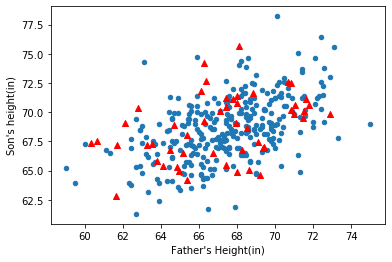

In [15]:
samples = np.random.multivariate_normal(mean=mu, cov=sigma, size=50)
df.sample(300, random_state=2445).plot.scatter(x='Father', y='Son' )
plt.scatter(samples[:, 0], samples[:, 1], marker='^', c='red')
plt.xlabel("Father's Height(in)")
plt.ylabel("Son's height(in)")

In [16]:
m = mu[1] + 0.501163*(np.math.sqrt(7.930949)/np.math.sqrt(7.539566))*(60-mu[0])
m

64.73315264995438

In [20]:
s = np.math.sqrt(7.930949*(1-np.math.pow(0.501163,2)))
s

2.4370017088950187

Text(0.5, 1.0, 'P(Y>72| X=60)')

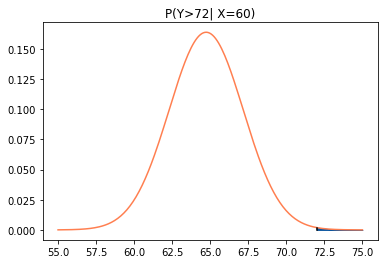

In [23]:
x = np.linspace(55, 75, 200)
y = norm.pdf(x,m,s)
plt.plot(x,y, color='coral')

# fill area 1

pt1 = 72
plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,m, s)], color='black')

pt2 = 75
plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,m, s)], color='black')

ptx = np.linspace(pt1, pt2, 10)
pty = scipy.stats.norm.pdf(ptx,m,s)

plt.fill_between(ptx, pty, color='#0b559f', alpha='1.0', )
plt.title("P(Y>72| X=60)")

In [24]:
x = np.random.sample([100,2])

In [25]:
import math
pi = math.pi

def PointsInCircum(r,n=500):
    return np.array([(math.cos(2*pi/n*x)*r+np.random.normal(loc=0, scale=0.1),
                      math.sin(2*pi/n*x)*r+np.random.normal(loc=0, scale=0.1)) for x in range(0,n+1)])

In [26]:
samples = PointsInCircum(1)

Text(0, 0.5, 'X2')

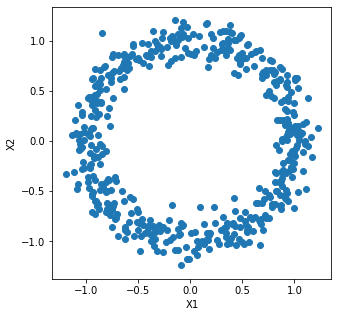

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(samples[:, 0], samples[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')

In [ ]:
z = np.random.multivariate_normal(mean=(0,0), cov=[[1.0, 0],[0,1.0]], size=50)

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(z[:, 0], z[:, 1], c='red')

In [ ]:
norms = np.apply_along_axis(np.linalg.norm, 1, z)

In [ ]:
np.max(norms)

In [ ]:
w = np.transpose(z.T / norms)+z/20

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(samples[:, 0], samples[:, 1])
plt.scatter(w[:, 0], w[:, 1], marker='^', c='red')

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train_2=X_train[np.where(y_train==2)]

NameError: name 'X_train_2' is not defined

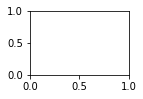

In [14]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    
    plt.imshow(X_train_2[i], cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
fig
plt.tight_layout()

In [ ]:
y_train

In [ ]:
z_mean = tf.random.uniform([1,10])
z_log_var = tf.random.uniform([1,10])
kl_loss = tf.reduce_sum(
    -0.5 * (z_log_var  - tf.exp(z_log_var) - tf.square(z_mean) + 1),
          axis=1)
kl_batch_loss = tf.reduce_mean(kl_loss)

In [ ]:
z_mean

In [107]:
def vae_encoder(latent_dim):
    epsilon = layers.Input(shape=latent_dim)
    img = layers.Input(shape=(28, 28, 1)) #For MNIST
    
    x = layers.Conv2D(filters=32, kernel_size=3, 
                      strides=2, padding='same')(img)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3
                      , strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)    
    x = layers.Flatten()(x)
    x = layers.Dense(16, activation="relu")(x)
    z_mean = layers.Dense(latent_dim, name="z_mean")(x)
    z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
    z = z_mean + tf.exp(0.5 * z_log_var) * epsilon
    return Model(inputs = [img, epsilon], outputs = [z_mean, z_log_var, z])

In [108]:
encoder = vae_encoder(2)

In [109]:
encoder.summary()

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, 14, 14, 32)   320         input_17[0][0]                   
__________________________________________________________________________________________________
leaky_re_lu_20 (LeakyReLU)      (None, 14, 14, 32)   0           conv2d_10[0][0]                  
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 7, 7, 64)     18496       leaky_re_lu_20[0][0]             
___________________________________________________________________________________________

In [110]:
def vae_decoder(latent_dim):
    z = layers.Input(shape=(latent_dim,))
    x = layers.Dense(7 * 7 * 64, activation="relu")(z)
    x = layers.Reshape((7, 7, 64))(x)
    x = layers.Conv2DTranspose(filters=64, kernel_size=3,
                               strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2DTranspose(filters=32, kernel_size=3,
                               strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    decoder_outputs = layers.Conv2DTranspose(1, 3, 
                activation="sigmoid",padding="same")(x)
    return Model(z, decoder_outputs)

In [111]:
decoder = vae_decoder(2)

In [112]:
decoder.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3136)              9408      
_________________________________________________________________
reshape_5 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_15 (Conv2DT (None, 14, 14, 64)        36928     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_transpose_16 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 28, 28, 32)        0  

In [113]:
BATCH_SIZE = 128
noise_dim=2
BUFFER_SIZE = 64000
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(mnist_digits).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [114]:
mnist_digits.shape

(70000, 28, 28, 1)

In [115]:
optimizer = tf.keras.optimizers.Adam()
total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")

In [116]:
@tf.function
def train_step(data):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as tape:
        z_mean, z_log_var, z = encoder([data, noise])
        reconstruction = decoder(z)

        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                 tf.keras.losses.binary_crossentropy(data, reconstruction), 
                 axis=(1, 2)
            )
        )
        '''
        #OR as sumsquared
        reconstruction_loss = tf.reduce_mean(
            tf.square(tf.norm(data-reconstruction))
        )
        '''
        kl_loss = tf.reduce_sum(
        -0.5 * (z_log_var  - tf.exp(z_log_var) - tf.square(z_mean) + 1),
              axis=1)
        kl_loss = tf.reduce_mean(kl_loss)
        total_loss = reconstruction_loss + kl_loss

    weights = encoder.trainable_variables + decoder.trainable_variables
    grads = tape.gradient(total_loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    total_loss_tracker.update_state(total_loss)

In [117]:
def train(dataset, epochs):
    for epoch in range(epochs):
        start = time.time()
        print('starting epoch {}'.format(epoch))
        
        for image_batch in dataset:   
            if image_batch.shape[0]==BATCH_SIZE:
                train_step(image_batch)
        print ('Time for epoch {} is {} sec, loss {}'.format(epoch + 1, time.time()-start, total_loss_tracker.result()))
        

In [118]:
train(train_dataset,100)

starting epoch 0
Time for epoch 1 is 68.88167238235474 sec, loss 201.6906280517578
starting epoch 1
Time for epoch 2 is 74.09121966362 sec, loss 183.30709838867188
starting epoch 2
Time for epoch 3 is 71.9161491394043 sec, loss 175.7162322998047
starting epoch 3
Time for epoch 4 is 68.56726908683777 sec, loss 171.3417205810547
starting epoch 4
Time for epoch 5 is 67.68574261665344 sec, loss 168.44285583496094
starting epoch 5
Time for epoch 6 is 70.58059358596802 sec, loss 166.3500518798828
starting epoch 6
Time for epoch 7 is 69.71936202049255 sec, loss 164.7151641845703
starting epoch 7
Time for epoch 8 is 67.60364937782288 sec, loss 163.4022674560547
starting epoch 8
Time for epoch 9 is 69.04160761833191 sec, loss 162.31712341308594
starting epoch 9
Time for epoch 10 is 68.6227433681488 sec, loss 161.38661193847656
starting epoch 10
Time for epoch 11 is 69.581533908844 sec, loss 160.5861053466797
starting epoch 11
Time for epoch 12 is 67.61559891700745 sec, loss 159.87533569335938
s

Time for epoch 97 is 71.25206255912781 sec, loss 148.3119354248047
starting epoch 97
Time for epoch 98 is 70.85356593132019 sec, loss 148.26864624023438
starting epoch 98
Time for epoch 99 is 83.65300178527832 sec, loss 148.22598266601562
starting epoch 99
Time for epoch 100 is 79.60587644577026 sec, loss 148.18348693847656


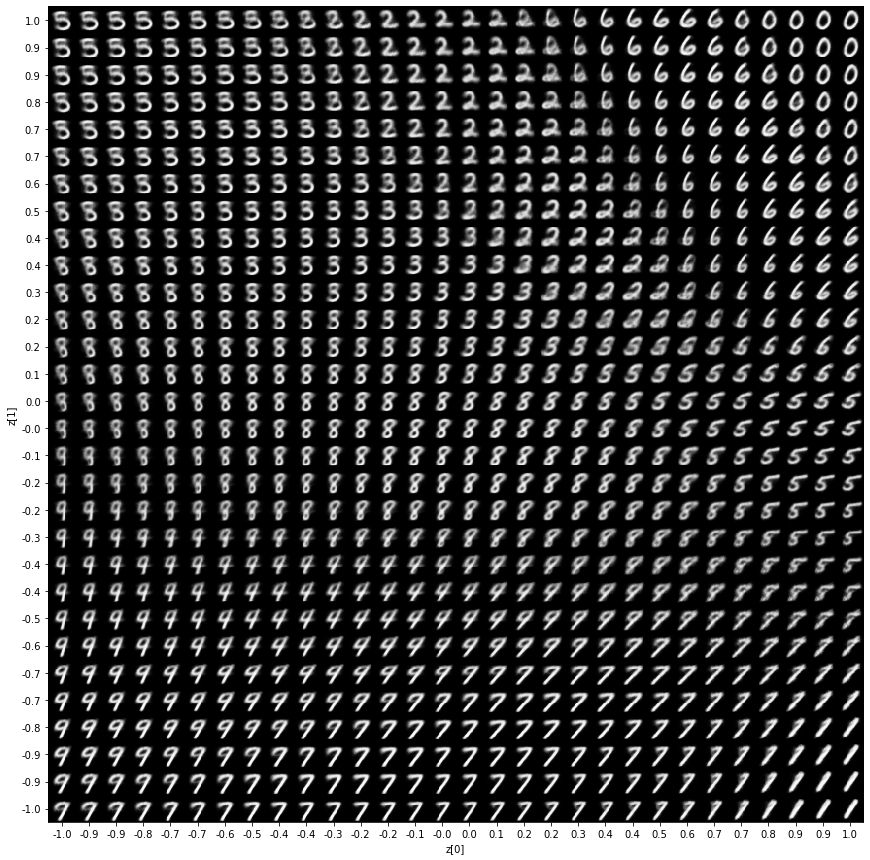

In [119]:
def plot_latent_space(n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space()